[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mosleh-exeter/BEM1025/blob/main/sessions/07-Tutorial07-Functions-practice-solutions.ipynb)

# Tutorial 07. functions-practice

In [7]:
import pandas as pd
import seaborn as sns

### Loading dataset

In [14]:
# this data is a sample from comercial software Tableau
df=pd.read_csv('https://www.dropbox.com/s/7t3ys1iu98r1bkf/Superstore.csv?dl=1',dtype={'Order Date':'str'})
selected_columns=['Order ID', 'Order Date', 'Product ID','Segment', 'Region','Category','variable','value']
df=df[selected_columns]
df.head(2)

,Order ID,Order Date,Product ID,Segment,Region,Category,variable,value
0,CA-2013-152156,2013-11-09 00:00:00,FUR-BO-10001798,Consumer,South,Furniture,Sales,261.96
1,CA-2013-152156,2013-11-09 00:00:00,FUR-CH-10000454,Consumer,South,Furniture,Sales,731.94


#### **Note**:
####   To extract some characters (letters) from a string X you can use X[i:j] where i indicates the first character and j-1 indicates the last character 

In [15]:
X='This is a book'
print ('first letter:', X[0],'second letter:', X[1])
print ('first two letters:',X[:2],'or', X[0:2])

first letter: T second letter: h
first two letters: Th or Th


### For each of the following tasks using pandas apply

**Q1.**  Create a new column in the dataset that shows 'true' if the order was made in the US, and 'false' if made in other places (e.g., Canada) using order ID

Do this using a regular function and also lambda


In [16]:
df['US']=df['Order ID'].apply(lambda x:x[:3]=='US-')

**Q1.** Create a new column that shows how many years has passed since the order was created using Order Date

**TIP:** You need to extract first 4 letters/characters of Order ID. To change a string to number you can use int(X) and then find 2022-int(X)

In [17]:
def year_calc(x):
    year=x[:4]
    return 2021-int(year)
df['order_age']=df['Order Date'].apply(year_calc)


**Q 3**. Use a boxplot to compare the profit margin per number of product sold across different categories. To do so you may need to tranform the dataframe to a wide dataframe then find profit margin by dividing profit by sales then divide the results by quantities.

Try this using both a regural function and lambda

In [32]:
df_pivoted=df.pivot_table(index=["Order ID","Order Date","Product ID","Segment","Region","Category"],
                         columns="variable",
                          values="value"
                         ).reset_index()


In [37]:
def profit_margin_pu(row):
    profit_margin=row['Profit']/row['Sales']
    return(profit_margin/row['Quantity'])

In [38]:
df_pivoted['profit_margin_perunit1']=df_pivoted.apply(lambda row:(row['Profit']/row['Sales'])/(row['Quantity']),axis=1)

In [39]:
df_pivoted['profit_margin_perunit2']=df_pivoted.apply(profit_margin_pu,axis=1)

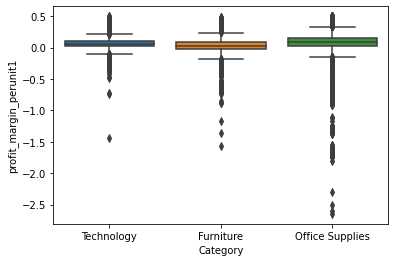

In [40]:
sns.boxplot(data=df_pivoted,
           x='Category',
           y='profit_margin_perunit1');


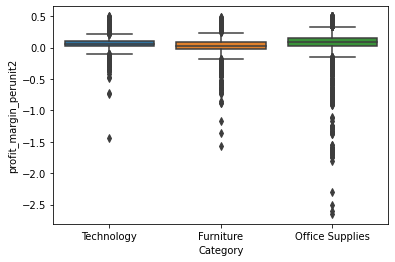

In [41]:
sns.boxplot(data=df_pivoted,
           x='Category',
           y='profit_margin_perunit2');